In [29]:
#Q1
# a)

import wikipedia
wiki = wikipedia.page('JackieChan')
text = wiki.content

#jctext = open ('')

In [30]:
# b)

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
jcvocabulary  = vectorizer.fit_transform([text])
print (jcvocabulary[0:10])

  (0, 1071)	58
  (0, 409)	249
  (0, 327)	5
  (0, 222)	7
  (0, 15)	2
  (0, 432)	27
  (0, 2137)	2
  (0, 2119)	1
  (0, 1637)	1
  (0, 1872)	1
  (0, 1212)	1
  (0, 1098)	2
  (0, 1746)	2
  (0, 1211)	2
  (0, 1177)	2
  (0, 288)	2
  (0, 1903)	476
  (0, 659)	15
  (0, 1062)	28
  (0, 988)	47
  (0, 1118)	48
  (0, 130)	11
  (0, 814)	5
  (0, 1241)	7
  (0, 237)	1
  :	:
  (0, 1703)	1
  (0, 313)	1
  (0, 1061)	1
  (0, 743)	2
  (0, 1849)	1
  (0, 1200)	1
  (0, 1507)	1
  (0, 329)	1
  (0, 2052)	1
  (0, 1064)	1
  (0, 817)	1
  (0, 630)	1
  (0, 1325)	1
  (0, 993)	1
  (0, 1454)	1
  (0, 1441)	1
  (0, 100)	1
  (0, 330)	1
  (0, 1571)	1
  (0, 1551)	1
  (0, 763)	1
  (0, 1175)	1
  (0, 1019)	1
  (0, 572)	1
  (0, 167)	1


In [31]:
# d)
# Convert words to lowercase
text = text.lower()

# Remove numbers
import re
text = re.sub(r'\d', '', text)

# Punctuation Removal
text = re.sub(r'[^\w\s]', '', text)

# Tokenization

text = text.split()

# Stop word removal
import nltk

stopwords = nltk.corpus.stopwords.words('english')


def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

text =  remove_stopwords(text)

# Stemming 
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()

def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text

text = stemming (text)

# Lemmatization
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text

text = lemmatizer (text)

print (text)

['jacki', 'chan', 'born', 'april', 'chine', '成龍', 'yale', 'roman', 'sìhng', 'lùhng', 'jyutp', 'sing', 'lung', 'lit', 'becom', 'dragon', 'hong', 'kong', 'actor', 'filmmak', 'martial', 'artist', 'stuntman', 'known', 'slapstick', 'acrobat', 'fight', 'style', 'comic', 'time', 'innov', 'stunt', 'typic', 'perform', 'chan', 'act', 'sinc', 'perform', 'film', 'one', 'popular', 'action', 'film', 'star', 'timechan', 'one', 'recognis', 'influenti', 'film', 'person', 'world', 'widespread', 'global', 'follow', 'eastern', 'western', 'hemispher', 'receiv', 'fame', 'star', 'hong', 'kong', 'avenu', 'star', 'hollywood', 'walk', 'fame', 'chan', 'referenc', 'variou', 'pop', 'song', 'cartoon', 'film', 'video', 'game', 'operat', 'train', 'vocalist', 'also', 'cantopop', 'mandopop', 'star', 'releas', 'number', 'music', 'album', 'sung', 'mani', 'theme', 'song', 'film', 'star', 'also', 'global', 'known', 'philanthropist', 'name', 'one', 'top', 'charit', 'celebr', 'forb', 'magazin', 'film', 'scholar', 'andrew', '

In [32]:
# e) 
from nltk import FreqDist

freq_text = FreqDist(text)

print('Most 10:',freq_text.most_common(10))

rearrest_10 = freq_text.most_common().copy()
rearrest_10.reverse()
print('Rearrest 10:',rearrest_10[0:11])


Most 10: [('chan', 229), ('film', 124), ('jacki', 57), ('hong', 47), ('kong', 45), ('stunt', 31), ('star', 31), ('also', 31), ('releas', 30), ('action', 25)]
Rearrest 10: [('allmovi', 1), ('databas', 1), ('imdb', 1), ('link', 1), ('extern', 1), ('read', 1), ('boulevard', 1), ('pictur', 1), ('pmw', 1), ('nomin', 1), ('discographi', 1)]


<Axes: >

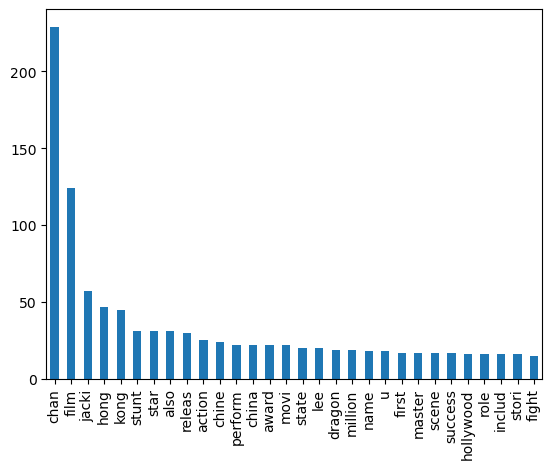

In [33]:
# f)
import matplotlib.pyplot as plt
import pandas as pd

df = pd.Series(dict(freq_text.most_common(30)))
df.plot(kind='bar')


In [38]:
# Q2
# a)
import nltk
import re
import numpy as np
import contractions
import nltk

train = pd.read_csv('D:/emotions/train.txt')
train[['words', 'emo']] = train['words'].str.split(';', expand=True) # modify text to do easier dataframe.

stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    doc = contractions.fix(doc)
   
    return doc

normalize_corpus = np.vectorize(normalize_document)

train['tkk'] = normalize_corpus(list(train['words']))


from nltk.tokenize import RegexpTokenizer

regexp = RegexpTokenizer('\w+')

train['tk']=train['words'].apply(regexp.tokenize)

train.head()


,words,emo,tkk,tk
0,i didnt feel humiliated,sadness,i did not feel humiliated,"[i, didnt, feel, humiliated]"
1,i can go from feeling so hopeless to so damned...,sadness,i can go from feeling so hopeless to so damned...,"[i, can, go, from, feeling, so, hopeless, to, ..."
2,im grabbing a minute to post i feel greedy wrong,anger,i am grabbing a minute to post i feel greedy w...,"[im, grabbing, a, minute, to, post, i, feel, g..."
3,i am ever feeling nostalgic about the fireplac...,love,i am ever feeling nostalgic about the fireplac...,"[i, am, ever, feeling, nostalgic, about, the, ..."
4,i am feeling grouchy,anger,i am feeling grouchy,"[i, am, feeling, grouchy]"


In [35]:
# b)
from sklearn.feature_extraction.text import CountVectorizer

cv= CountVectorizer(ngram_range=(1, 2), min_df=0.001, max_df=0.99, stop_words='english')

train_prc =cv.fit_transform(train['words'])

print ('By CountVectorizer')
print (train_prc.shape)
print (cv.vocabulary_)

from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(ngram_range=(1, 2), min_df=0.001, max_df=0.99, stop_words='english')
tv.fit_transform(train['words'])
vector = tv.transform(train['words'])
print ('By TfidfVectorizer')
print(vector.toarray().shape)
print(tv.vocabulary_)

By CountVectorizer
(16000, 1675)
{'didnt': 266, 'feel': 400, 'humiliated': 843, 'didnt feel': 267, 'feel humiliated': 484, 'feeling': 609, 'hopeless': 828, 'hopeful': 826, 'just': 915, 'awake': 63, 'im': 858, 'minute': 1075, 'post': 1195, 'greedy': 754, 'wrong': 1662, 'feel greedy': 471, 'nostalgic': 1116, 'know': 932, 'feeling nostalgic': 649, 'grouchy': 756, 'ive': 904, 'little': 999, 'burdened': 126, 'lately': 947, 'wasnt': 1605, 'sure': 1454, 'ive feeling': 905, 'feeling little': 643, 'taking': 1463, 'times': 1508, 'asleep': 55, 'lot': 1025, 'like': 972, 'funny': 716, 'feel like': 507, 'confused': 192, 'life': 969, 'jaded': 907, 'year': 1667, 'old': 1130, 'man': 1046, 'year old': 1668, 'years': 1669, 'huge': 841, 'romantic': 1290, 'make': 1039, 'suffering': 1443, 'seeing': 1316, 'mean': 1051, 'running': 1295, 'divine': 289, 'experience': 368, 'expect': 366, 'type': 1546, 'think': 1494, 'time': 1505, 'dissatisfied': 283, 'feel dissatisfied': 445, 'low': 1034, 'energy': 345, 'general

In [36]:
# c)
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

train = pd.read_csv('D:/emotions/train.txt')
train[['words', 'emo']] = train['words'].str.split(';', expand=True)
X_train= train['words'].values
Y_train = train['emo'].values

tv = TfidfVectorizer(ngram_range=(1, 2), min_df=0.001, max_df=0.999, stop_words='english')
X_train = tv.fit_transform(X_train)

model_re = LogisticRegression()
model_re.fit(X_train, Y_train)

y_pred = model_re.predict(X_train[0:5])

print('From LogisticRegression prediction:', y_pred)
print ('Real one:', Y_train[0:5])

model_nn = MLPClassifier(hidden_layer_sizes=(5, 2), activation='relu', solver='adam') # low hidden_layer_sizes to make it qucik but low accuracy.
model_nn.fit(X_train, Y_train)

y_pred = model_nn.predict(X_train[0:5])

print('From Neural Network  prediction:', y_pred)
print ('Real one:', Y_train[0:5])


c:\ProgramData\Miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


From LogisticRegression prediction: ['sadness' 'sadness' 'anger' 'love' 'anger']
Real one: ['sadness' 'sadness' 'anger' 'love' 'anger']
From Neural Network  prediction: ['sadness' 'sadness' 'sadness' 'joy' 'sadness']
Real one: ['sadness' 'sadness' 'anger' 'love' 'anger']


c:\ProgramData\Miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [37]:
# d) xxx
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

test = pd.read_csv('D:/emotions/test.txt')
test[['words', 'emo']] = test['words'].str.split(';', expand=True)
X_test= test['words'].values
Y_test = test['emo'].values

X_test = tv.fit_transform(X_test)


print (model_re.predict(X_test))

#print ('Accuracy of Neural Network: \n', classification_report (model_nn.predict(X_test), Y_test))
#print ('Accuracy of Logistic Regression: \n', classification_report (model_re.predict(X_test), Y_test))
#print ('Confuison matrix: \n', confusion_matrix (model_re.predict(X_test), Y_test),'\n')

ValueError: X has 2603 features, but LogisticRegression is expecting 1675 features as input.

In [ ]:
# e) xxx

test_word1 = ['i feel so sad now',]
test_word1 = vt.fit_transform(test_word1)

test_word2 = ['today i am really happy',]
test_word2 = vt.fit_transform(test_word2)


y_pred1 = model_re.predict(test_word1)
y_pred2 = model_re.predict(test_word2)

print('From LogisticRegression prediction:', y_pred)

print('From Neural Network  prediction:', y_pred)



ValueError: X has 2 features, but LogisticRegression is expecting 14894 features as input.

c:\ProgramData\Miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


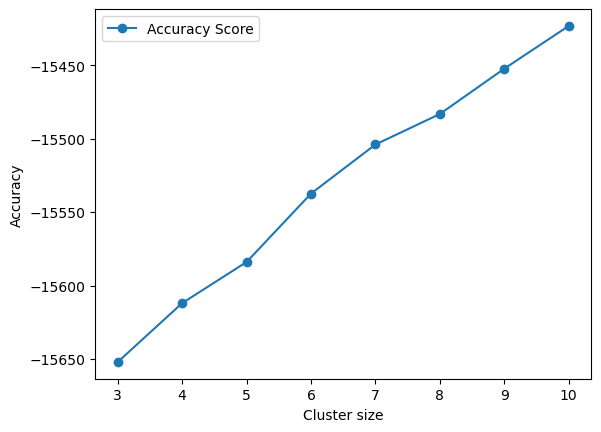

cluster size = 9 is best


In [ ]:
# f)
from sklearn.cluster import KMeans
from sklearn import preprocessing
import numpy as np
le = preprocessing.LabelEncoder()

train = pd.read_csv('D:/emotions/train.txt')
train[['words', 'emo']] = train['words'].str.split(';', expand=True)

train['emo'] = le.fit_transform(train['emo'])

X_train= train['words'].values
Y_train = train['emo'].values

tv = TfidfVectorizer(stop_words='english')
X_train = tv.fit_transform(X_train)

import matplotlib.pyplot as plt
scores_kmean = []
x_number = np.arange (3,11,1)

for n_number in range (8):
    kmeans = KMeans(n_clusters=3+n_number).fit(X_train)
    cluster_labels = kmeans.labels_
    scores_kmean.append (kmeans.score(X_train, cluster_labels))

y_number = np.array (scores_kmean)

plt.plot (x_number, y_number,marker='o', label='Accuracy Score')
plt.xlabel ('Cluster size')
plt.ylabel ('Accuracy')
plt.xticks(x_number, x_number)
plt.legend ()
plt.show ()
print ('cluster size = 7 is best')



In [ ]:
# g)

test = pd.read_csv('D:/emotions/test.txt')
test[['words', 'emo']] = test['words'].str.split(';', expand=True)

test['emo'] = le.fit_transform(test['emo'])

X_test= test['words'].values
Y_tess = test['emo'].values


X_test = tv.fit_transform(X_test)

model_kmean = KMeans(n_clusters=7).fit(X_train)

model_nn.predict(X_test)

c:\ProgramData\Miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


ValueError: X has 4517 features, but MLPClassifier is expecting 14894 features as input.

In [ ]:
# Q3
# a)
from sklearn.model_selection import train_test_split

movie_pd = pd.read_csv('D:/movie_data.csv')

X_data = movie_pd['review']
Y_data = movie_pd['sentiment']
X_train, X_test, Y_train, Y_test = train_test_split (X_data.values, Y_data.values, test_size=0.3)

(35000,)

In [ ]:
# b)
